# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile AplusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing AplusB.cpp


In [ ]:
!g++ AplusB.cpp -o sum
!./sum

5 9
14

In [ ]:
!g++ AplusB.cpp -o sum
!./sum

15 89
104

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

4 8
12


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

8
24 68 93 49 3109 4912 134 12
15271408


### Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile input1.txt
5
1 3 200000 9 200000 23

Writing input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1345294336


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [ ]:
%%writefile generate_Test1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;

FILE *outfile;
vector <int> a;

int main() {

    long long n = 200000;

    outfile = fopen("Test1.txt", "w");

    fprintf(outfile, "%d\n", n);

    for (long long i=0; i<n; i++) {
        fprintf(outfile, "%d ", rand());

    }

    return 0;


}

Writing generate_Test1.cpp


In [ ]:
!g++ generate_Test1.cpp -o genst
!./genst

generate_StressTest1.cpp: In function ‘int main()’:
generate_StressTest1.cpp:18:31: warning: format ‘%d’ expects argument of type ‘int’, but argument 3 has type ‘long long int’ [-Wformat=]
     fprintf(outfile, "%d\n", n);
                               ^


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < Test1.txt

4611630033697999785


Tiempo: 130.877 s

### Efficient solution 

In [ ]:
%%writefile max_pairwise_product_fast.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProductFast(const vector<int> &numbers) {
    int n = numbers.size();

    int max_index1 = -1;
    for (int i = 0; i < n; ++i)
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1]))
            max_index1 = i;

    int max_index2 = -1;
    for (int j = 0; j < n; ++j)
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2])))
            max_index2 = j;

    return ((long long) (numbers[max_index1])) * numbers[max_index2];
}

int main() {
    
    int n;
    cin >> n;
    vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        cin >> numbers[i];
    }

    long long result = MaxPairwiseProductFast(numbers);
    cout << result << "\n";
    return 0;
    
}

Overwriting max_pairwise_product_fast.cpp


Stress tests 

In [4]:
%%writefile StressTest1.cpp

#include <cstdlib>
#include <iostream>
#include <vector>
#include <stdio.h>

using std::vector;
using std::cout;

FILE *outfile;
vector <int> a;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductFast(const vector<int> &numbers) {
    int n = numbers.size();

    int max_index1 = -1;
    for (int i = 0; i < n; ++i)
        if ((max_index1 == -1) || (numbers[i] > numbers[max_index1]))
            max_index1 = i;

    int max_index2 = -1;
    for (int j = 0; j < n; ++j)
        if ((j != max_index1) && ((max_index2 == -1) || (numbers[j] > numbers[max_index2])))
            max_index2 = j;

    return ((long long) (numbers[max_index1])) * numbers[max_index2];
}

int main() {

    while (true) {

        int n = rand() % 10 + 2;
        cout << n << "\n";
        vector <int> a;

        for (int i=0; i<n; i++) {
            a.push_back(rand() % 10000);
        }

        for (int i=0; i<n; i++) {
            cout << a[i] << " ";
        }

        cout << "\n";

        long long res1 = MaxPairwiseProduct(a);
        long long res2 = MaxPairwiseProductFast(a);

        if (res1 != res2) {
            cout << "Wrong answer: " << res1 << " " << res2 << "\n";
            break;
        }
        else {
            cout << "OK\n";
        }

    }


}

Overwriting StressTest1.cpp


In [6]:
!g++ StressTest1.cpp -o StressTest1
!./StressTest1

Se han truncado las últimas 5000 líneas del flujo de salida.
1530 1963 
OK
10
2968 4000 2191 6107 1907 4611 1128 2510 1292 1230 
OK
7
1093 5114 7445 5505 5525 6005 4535 
OK
11
5141 9125 9819 77 1844 1397 6789 3278 8210 8319 1593 
OK
10
7640 5593 4629 99 3852 9240 1227 6362 6885 8809 
OK
9
4330 3923 9534 9835 9448 1892 723 608 3385 
OK
10
427 3462 8044 8176 6603 1322 6386 1275 2915 5176 
OK
9
8509 6158 5366 2361 1750 6593 5076 8635 5402 
OK
7
9318 5678 3052 9153 5126 4944 9876 
OK
8
4681 6076 8865 8143 4121 3394 1099 5443 
OK
4
2374 8359 1309 7641 
OK
2
3819 9359 
OK
5
5569 5952 7009 557 7706 
OK
9
9875 3384 3579 5380 4863 8523 1609 3301 3204 
OK
7
8519 7699 1806 8265 5150 3602 4397 
OK
6
8313 2058 1517 1533 5877 876 
OK
10
7799 3180 3180 8356 7239 3707 8231 623 3638 3611 
OK
10
8513 1572 1492 1717 9258 6363 5768 7416 4628 919 
OK
2
9025 4795 
OK
5
1084 2665 3568 3313 9893 
OK
9
1112 9426 2919 9468 6665 6626 4051 3640 6616 
OK
7
1831 5129 5587 3323 3198 1197 9686 
OK
8
4966 4314 6237 23

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Se han truncado las últimas 5000 líneas del flujo de salida.
2924 1018 9890 7262 1063 5834 8421 
OK
10
9672 9336 8058 183 3571 2311 7087 962 1708 2435 
OK
6
9680 1831 46 3570 3843 2869 
OK
9
3380 7046 6530 959 1192 5807 1978 1082 3069 
OK
5
6917 7842 351 2941 7178 
OK
2
9476 7101 
OK
5
6564 4415 8781 8999 5071 
OK
3
7183 5117 8384 
OK
8
4338 833 758 7737 3716 1717 8929 5875 
OK
7
6363 5296 3088 3280 3138 9792 2574 
OK
11
4554 2050 3770 1627 8614 4538 6761 3966 9609 1574 1149 
OK
11
9958 8527 1769 7144 9285 9506 860 1002 4787 3087 1050 
OK
3
8383 490 783 
OK
3
282 3357 4542 
OK
10
1760 4665 9168 6726 9203 5929 692 5164 7503 8193 
OK
5
3814 6720 4365 958 6005 
OK
5
8170 7008 5011 7609 4410 
OK
4
5992 4900 6945 3865 
OK
5
6655 8408 2723 8415 3073 
OK
3
5141 2276 4172 
OK
8
7440 1676 379 36 1842 3452 753 9152 
OK
9
976 3674 2817 2339 1283 7227 8501 7275 2128 
OK
11
1140 3663 8454 9548 2738 3221 8973 4630 8362 1249 5154 
OK
2
5042 3182 
OK
2
1430 5024 
OK
6
8535 4176 6541 5863 4202 5711 
OK

Measure with test file of the maximun n 200000 numbres 

In [ ]:
!g++ max_pairwise_product_fast.cpp -o max_pairwise_product_fast
!./max_pairwise_product_fast < Test1.txt

4611630033697999785


Tiempo: 1.261 s

## Python

In [ ]:
%%writefile max_pairwise_productp.py

def max_pairwise_product(n, a):

    result = 0

    for i in range(0, n):
        for j in range(i + 1, n):
            if a[i] * a[j] > result:
                result = a[i] * a[j]
    return result


if __name__ == '__main__':
    n = int(input())
    a = [int(x) for x in input().split()]

    print(max_pairwise_product(n, a))

Overwriting max_pairwise_productp.py


In [ ]:
!python max_pairwise_productp.py

4
92348 27348 2842 424
2525533104


### Test 1: lagest input numbers 200000 200000 in the input

In [ ]:
%%writefile input1.txt
7
13 36 124 200000 9 200000 23

Overwriting input1.txt


In [ ]:
!python max_pairwise_productp.py < input1.txt

40000000000


### Test 2  generate a tests file with the maximun n 200000 numbres and measure time

In [ ]:
from random import randint

test = open("Test2.txt", "w")

n = 200000

test.write(str(n) + "\n")

for i in range(n):
    test.write(str(randint(0, 2000000)) + " ")

In [ ]:
!python max_pairwise_productp.py < Test2.txt

3999876000705


Tiempo: 2220.181 s

##Efficient solution

In [ ]:
%%writefile max_pairwise_product_fastp.py

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1
    for i in range(n):
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:
            max_index1 = i

    max_index2 = -1
    for i in range(n):
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):
            max_index2 = i

    return numbers[max_index1] * numbers[max_index2]


if __name__ == '__main__':
    n = int(input())
    a = [int(x) for x in input().split()]

    print(max_pairwise_product_fast(n, a))

Overwriting max_pairwise_product_fastp.py


Stress Tests

In [15]:
from random import randint

def max_pairwise_product(n, a):

    result = 0

    for i in range(0, n):
        for j in range(i + 1, n):
            if a[i] * a[j] > result:
                result = a[i] * a[j]
    return result

def max_pairwise_product_fast(n, numbers):
    max_index1 = -1
    for i in range(n):
        if max_index1 == -1 or numbers[i] > numbers[max_index1]:
            max_index1 = i

    max_index2 = -1
    for i in range(n):
        if i != max_index1 and (max_index2 == -1 or numbers[i] > numbers[max_index2]):
            max_index2 = i

    return numbers[max_index1] * numbers[max_index2]

if __name__ == "__main__":

    while True:
        n = randint(2, 20000)
        print(n)
        a = []

        for i in range(n):
          a.append(randint(0, 10000))

        for i in range(n):
          print(a[i], end=" ")

        print("")

        res1 = max_pairwise_product(n, a)
        res2 = max_pairwise_product_fast(n, a)

        if res1 != res2:
            print("Wrong answer:", res1, res2)
            break
        else:
            print("OK\n")

13127
1960 7311 8637 4117 6198 7980 4244 2476 8611 782 8458 5645 2487 3448 2531 6035 1964 7460 1297 6984 3795 142 8433 1403 8419 6820 9778 7301 3402 4653 7437 4859 9433 1693 5541 658 7232 5118 6644 4424 9287 8890 4259 6616 8590 2806 4171 3277 6017 8569 6569 925 2569 4016 704 9122 9999 5849 5018 2911 2563 8651 7097 9122 601 9412 3753 5978 3019 7603 8126 1882 981 5390 8445 9988 5880 5629 9582 5079 2747 4479 6936 540 789 9373 8876 779 4556 8531 6398 3474 9333 813 5923 7370 6931 1786 2837 9705 4235 432 3889 2056 289 3360 6951 1939 2857 5046 4372 6009 4356 6100 8523 4207 8150 7980 6461 1588 6929 4292 8536 1030 5465 9550 5941 9704 9532 1489 304 9117 9772 7839 1953 5780 1388 9722 5078 3347 8559 9681 5368 4471 6036 8872 2240 6047 7202 4452 1297 4375 1393 3206 3427 3887 6584 7323 2957 5884 2741 4068 2131 9276 5271 9205 5979 9629 879 8998 9452 4709 1946 6996 3223 8040 3151 2011 650 8996 8078 5449 8323 4711 2926 8270 7184 316 8323 2011 3484 1958 5838 2998 4681 2978 9096 797 425 209 9056 2365 4328

KeyboardInterrupt: ignored

Measure with test file of the maximun n 200000 numbres

In [ ]:
!python max_pairwise_product_fastp.py < Test2.txt

3999876000705


Tiempo: 0.638 s

##Submmit Week 1

Sum of Two Digits:

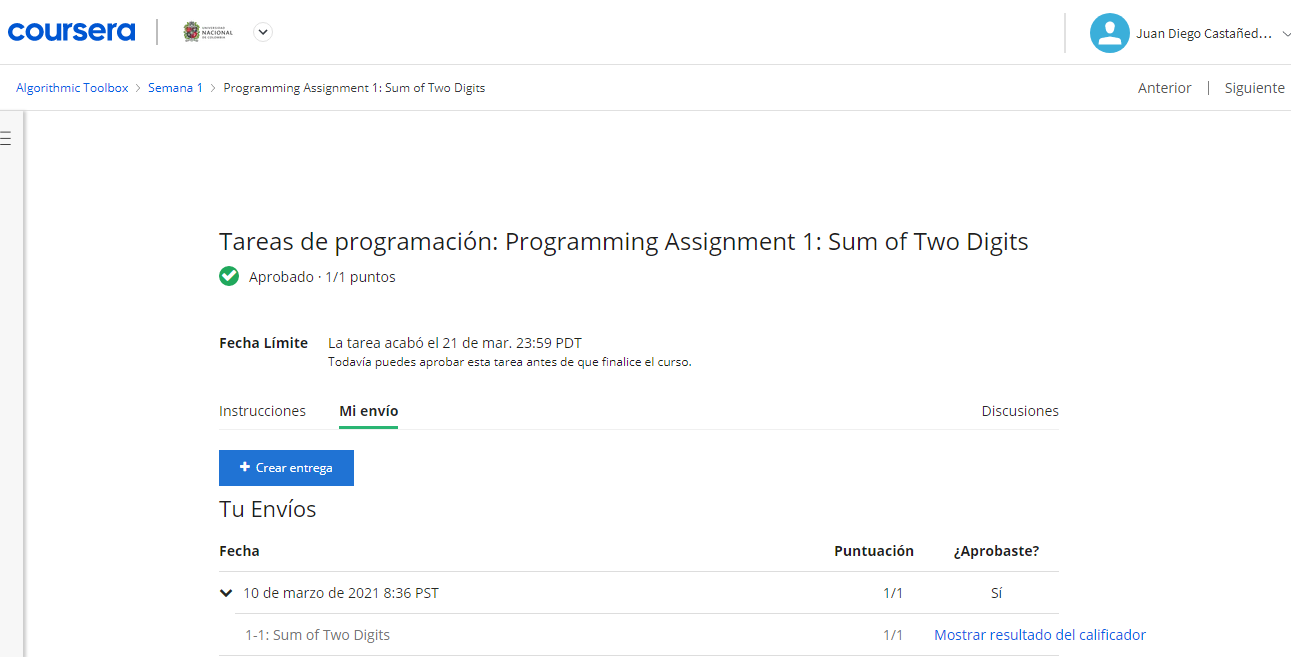

Maximum Pairwise Product:

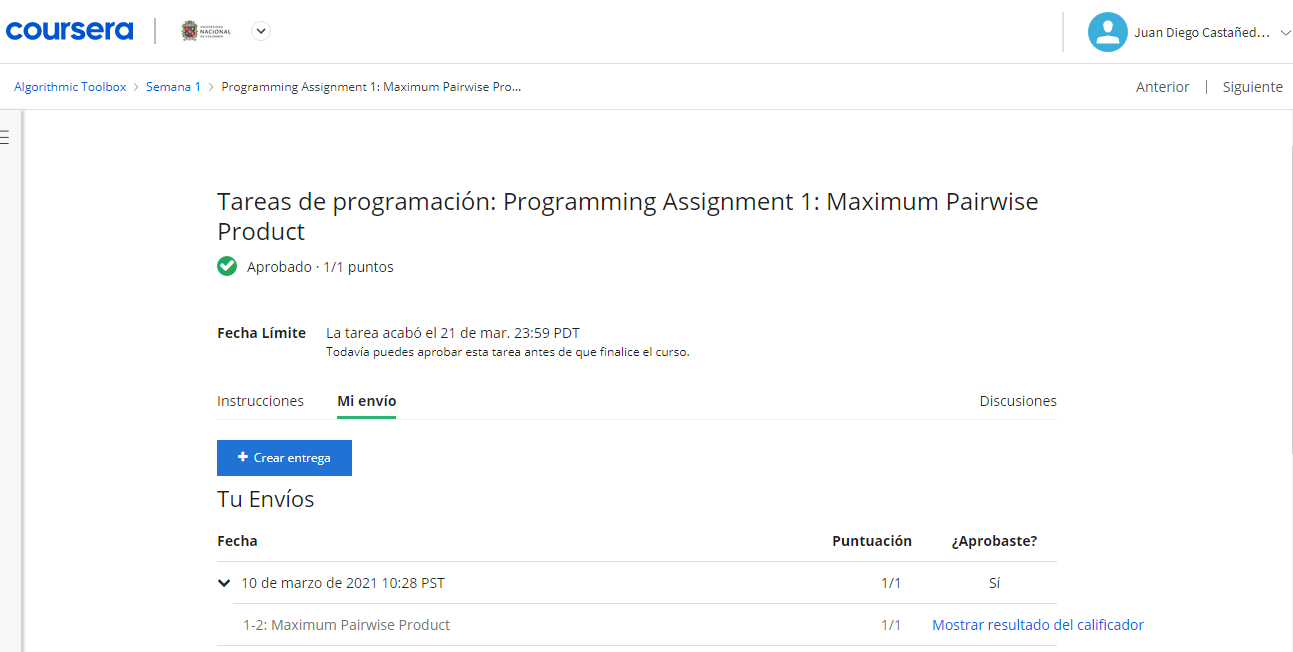